Data Modeling and Evaluation

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

desc_features = ['Sales', 'Quantity', 'Discount', 'Profit']
target_feature = 'Category'
cat_features = ['Order ID', 'Customer ID', 'Segment', 'City', 'State', 'Postal Code', 'Product ID', 'Sub-Category', 'Product Name']
target_levels = []
col = pd.read_excel('DataPostProcess.xlsx', nrows=0).columns
df = pd.read_excel('DataPostProcess.xlsx', names = col, index_col='Row ID')
df.head()


,Order ID,Customer ID,Segment,City,State,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,
1,CA-2016-152156,CG-12520,Consumer,Henderson,Kentucky,42420,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,0.177190,0.138125,0.000000,0.514147
2,CA-2016-152156,CG-12520,Consumer,Henderson,Kentucky,42420,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",0.495626,0.276251,0.000000,0.703753
3,CA-2016-138688,DV-13045,Corporate,Los Angeles,California,90036,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,0.009605,0.138125,0.000000,0.476751
4,US-2015-108966,SO-20335,Consumer,Fort Lauderdale,Florida,33311,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,0.648507,0.552502,0.790713,0.060651
5,US-2015-108966,SO-20335,Consumer,Fort Lauderdale,Florida,33311,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,0.014855,0.138125,0.351428,0.472103


Testing and Training

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[desc_features], df[target_feature], test_size=0.25)
display(X_train, X_test, Y_train, Y_test)

,Sales,Quantity,Discount,Profit
Row ID,,,,
1554,0.084224,0.552502,0.000000,0.530658
5,0.014855,0.138125,0.351428,0.472103
5031,0.005506,0.000000,0.000000,0.471796
6440,0.399054,0.552502,0.175714,0.462429
2444,0.064134,0.552502,0.000000,0.501894
...,...,...,...,...
2587,0.168118,0.828753,0.000000,0.541041
4832,0.024518,0.276251,0.000000,0.479972
3010,0.164940,0.552502,0.351428,0.498698


,Sales,Quantity,Discount,Profit
Row ID,,,,
1970,0.197517,0.414376,0.000000,0.578470
2138,0.002176,0.414376,1.000000,0.463175
3697,0.029010,0.276251,0.000000,0.484653
7870,0.015960,0.138125,0.351428,0.466536
8413,0.632130,0.414376,0.527142,0.284423
...,...,...,...,...
4707,0.117078,0.414376,0.000000,0.487906
1521,0.010892,0.552502,0.351428,0.471621
9535,0.022384,0.138125,0.000000,0.470847


Row ID
1554    Office Supplies
5       Office Supplies
5031    Office Supplies
6440          Furniture
2444         Technology
             ...       
2587    Office Supplies
4832    Office Supplies
3010    Office Supplies
3001    Office Supplies
4160    Office Supplies
Name: Category, Length: 7495, dtype: object

Row ID
1970         Technology
2138    Office Supplies
3697    Office Supplies
7870         Technology
8413          Furniture
             ...       
4707          Furniture
1521    Office Supplies
9535    Office Supplies
6             Furniture
5871          Furniture
Name: Category, Length: 2499, dtype: object

Determine if sampling is needed by seeing how much data is each class in our target feature.

In [19]:
df.groupby('Category').count()

,Order ID,Customer ID,Segment,City,State,Postal Code,Product ID,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Category,,,,,,,,,,,,,
Furniture,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121
Office Supplies,6026,6026,6026,6026,6026,6026,6026,6026,6026,6026,6026,6026,6026
Technology,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847,1847


As there is an uneven distribution in our dataset as Office Supplies are a majority we will be sampling with sklearns class_weight.

# Evaluation methods: 
- Information-Based Learning 
  - Decision Tree
- Similarity-Based Learning
  - Weighted KNN
- Probability-Based Learning
  - Guassian Naive Bayes

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import roc_curve

# Decision Tree
Utilizing the gini criterion as it is computationally less expensive, and roughly the same accuracy as entropy.

<bound method DecisionTreeClassifier.fit of DecisionTreeClassifier(class_weight='balanced', max_depth=13, random_state=0)>

array(['Furniture', 'Office Supplies', 'Office Supplies', ...,
       'Technology', 'Furniture', 'Technology'], dtype=object)

Accuracy is


0.7026810724289716

Error rate is


0.2973189275710284

Classification Report
                 precision    recall  f1-score   support

      Furniture       0.60      0.57      0.59       548
Office Supplies       0.85      0.76      0.81      1507
     Technology       0.46      0.65      0.54       444

       accuracy                           0.70      2499
      macro avg       0.64      0.66      0.65      2499
   weighted avg       0.73      0.70      0.71      2499



,Technology,Office Supplies,Furniture
Technology,290,90,64
Office Supplies,211,1151,145
Furniture,123,110,315


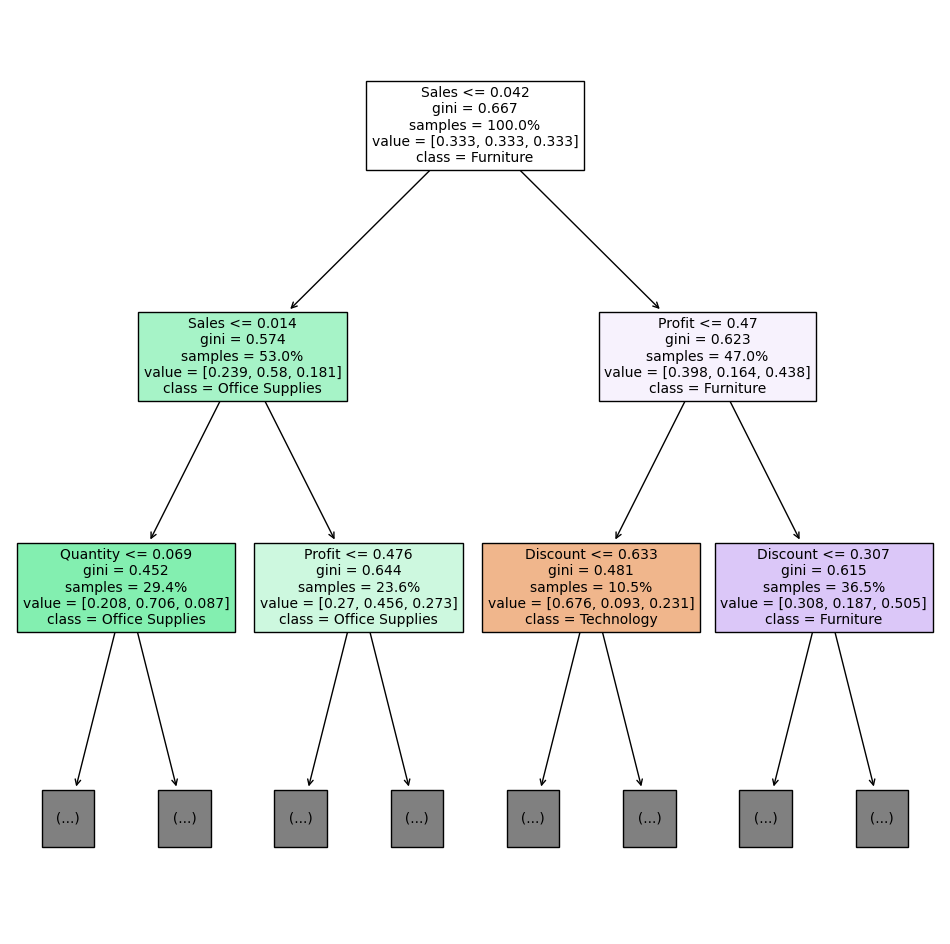

In [42]:
clf = DecisionTreeClassifier(max_depth = 13, criterion = 'gini', random_state=0, class_weight = 'balanced')
clf.fit(X_train,Y_train)
display(clf.fit)
y_pred = clf.predict(X_test)
display(y_pred)
print("Accuracy is")
accuracy = accuracy_score(Y_test, y_pred)
display(accuracy)
print("Error rate is")
display(1-accuracy)

cm = confusion_matrix(Y_test, y_pred, labels = ["Technology", "Office Supplies", "Furniture"])
cm_df = pd.DataFrame(cm, columns = ["Technology", "Office Supplies", "Furniture"], index = ["Technology", "Office Supplies", "Furniture"])
display(cm_df)

class_report = classification_report(Y_test, y_pred)
print("Classification Report")
print(class_report)

plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 30})
tree.plot_tree(clf, feature_names=desc_features, class_names = ["Technology", "Office Supplies", "Furniture"], filled=True, proportion='True',max_depth=2,fontsize=10)
plt.show()

# KNN 

In [48]:
results = pd.DataFrame(columns=['K-Value', 'Testing Accuracy'])

for kvalue in range (1,151):
    knc = KNeighborsClassifier(n_neighbors=kvalue, metric='euclidean')
    #fits the training data to the model
    knc.fit(X_train, Y_train)
    #makes predictions based on X data
    target_pred = knc.predict(X_test)
    #stores results in a dataframe
    results.loc[kvalue] = [kvalue, accuracy_score(Y_test, target_pred)]
kvalue = int(results.loc[results['Testing Accuracy'].idxmax()]['K-Value'])
print('k-value: '+str(kvalue))
knc = KNeighborsClassifier(n_neighbors=kvalue, metric='euclidean')
knc.fit(X_train, Y_train)
y_pred = knc.predict(X_test)
display(y_pred)
print("Accuracy is")
accuracy = accuracy_score(Y_test, y_pred)
display(accuracy)
print("Error rate is")
display(1-accuracy)

cm = confusion_matrix(Y_test, y_pred, labels = ["Technology", "Office Supplies", "Furniture"])
cm_df = pd.DataFrame(cm, columns = ["Technology", "Office Supplies", "Furniture"], index = ["Technology", "Office Supplies", "Furniture"])
display(cm_df)

class_report = classification_report(Y_test, y_pred)
print("Classification Report")
print(class_report)

plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 10})
results.pop('K-Value')
results.plot(xlabel='K-Value', ylabel='Accuracy')
plt.show()

c:\Users\droc1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\droc1\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# Gaussian Naive Bayes

In [47]:
gaus = GaussianNB()
gaus.fit(X_train,Y_train)
y_pred = gaus.predict(X_test)
display(y_pred)
print("Accuracy is")
accuracy = accuracy_score(Y_test, y_pred)
display(accuracy)
print("Error rate is")
display(1-accuracy)

cm = confusion_matrix(Y_test, y_pred, labels = ["Technology", "Office Supplies", "Furniture"])
cm_df = pd.DataFrame(cm, columns = ["Technology", "Office Supplies", "Furniture"], index = ["Technology", "Office Supplies", "Furniture"])
display(cm_df)

class_report = classification_report(Y_test, y_pred)
print("Classification Report")
print(class_report)

array(['Office Supplies', 'Office Supplies', 'Office Supplies', ...,
       'Office Supplies', 'Office Supplies', 'Technology'], dtype='<U15')

Accuracy is


0.6298519407763106

Error rate is


0.37014805922368943

Classification Report
                 precision    recall  f1-score   support

      Furniture       0.67      0.10      0.18       548
Office Supplies       0.65      0.95      0.77      1507
     Technology       0.38      0.19      0.25       444

       accuracy                           0.63      2499
      macro avg       0.57      0.41      0.40      2499
   weighted avg       0.61      0.63      0.55      2499



,Technology,Office Supplies,Furniture
Technology,84,344,16
Office Supplies,62,1433,12
Furniture,75,416,57


# Hyper Parameter Optimization

In [69]:
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

set_config(display="diagram")
target = df[target_feature]
hyperdf = df.drop(columns = [target_feature])
data_train, data_test, target_train, target_test = train_test_split(hyperdf, target, random_state=42)
categorical_columns_selector = make_column_selector(dtype_include=object)
categorical_columns = categorical_columns_selector(hyperdf)
categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1)
preprocessor = ColumnTransformer([('cat_preprocessor', categorical_preprocessor, categorical_columns)],remainder='passthrough', sparse_threshold=0)
model = Pipeline([("preprocessor", preprocessor),("classifier",HistGradientBoostingClassifier(random_state=42, max_leaf_nodes=4))])
param_grid = {'classifier__learning_rate': (0.01, 0.1, 1, 10),'classifier__max_leaf_nodes': (3, 10, 30)}
model_grid_search = GridSearchCV(model, param_grid=param_grid,n_jobs=2, cv=2)
model_grid_search.fit(data_train, target_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          sparse_threshold=0,
                                                          transformers=[('cat_preprocessor',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Order '
                                                                          'ID',
                                                                          'Customer '
                                                                          'ID',
                                                                          'Segment',
                                                                          'City',
                                                                          'State',
                                                                          'Product '
                                                                          'ID',
                                                                          'Sub-Category',
                                                                          'Product '
                                                                          'Name'])])),
                                       ('classifier',
                                        HistGradientBoostingClassifier(max_leaf_nodes=4,
                                                                       random_state=42))]),
             n_jobs=2,
             param_grid={'classifier__learning_rate': (0.01, 0.1, 1, 10),
                         'classifier__max_leaf_nodes': (3, 10, 30)})

In [70]:
accuracy = model_grid_search.score(data_test, target_test)
print(
    f"The test accuracy score of the grid-searched pipeline is: "
    f"{accuracy:.2f}"
)

The test accuracy score of the grid-searched pipeline is: 0.97


In [71]:
model_grid_search.predict(data_test.iloc[0:5])

array(['Office Supplies', 'Office Supplies', 'Furniture', 'Furniture',
       'Furniture'], dtype=object)

In [72]:
print(f"The best set of parameters is: "
      f"{model_grid_search.best_params_}")


The best set of parameters is: {'classifier__learning_rate': 0.1, 'classifier__max_leaf_nodes': 3}


In [73]:
cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values(
    "mean_test_score", ascending=False)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__learning_rate,param_classifier__max_leaf_nodes,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
3,0.661327,0.120388,0.111363,0.004776,0.1,3,"{'classifier__learning_rate': 0.1, 'classifier...",0.903949,0.938084,0.921016,0.017068,1
4,0.884349,0.097335,0.079222,0.003683,0.1,10,"{'classifier__learning_rate': 0.1, 'classifier...",0.903949,0.897785,0.900867,0.003082,2
5,2.226077,0.090144,0.152936,0.032370,0.1,30,"{'classifier__learning_rate': 0.1, 'classifier...",0.903949,0.897785,0.900867,0.003082,2
1,0.813284,0.010995,0.069833,0.001001,0.01,10,"{'classifier__learning_rate': 0.01, 'classifie...",0.903682,0.897785,0.900733,0.002949,4
2,1.963764,0.054270,0.088540,0.000995,0.01,30,"{'classifier__learning_rate': 0.01, 'classifie...",0.903682,0.897785,0.900733,0.002949,4


In [74]:
column_results = [f"param_{name}" for name in param_grid.keys()]
column_results += [
    "mean_test_score", "std_test_score", "rank_test_score"]
cv_results = cv_results[column_results]
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name


cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,learning_rate,max_leaf_nodes,mean_test_score,std_test_score,rank_test_score
3,0.1,3,0.921016,0.017068,1
4,0.1,10,0.900867,0.003082,2
5,0.1,30,0.900867,0.003082,2
1,0.01,10,0.900733,0.002949,4
2,0.01,30,0.900733,0.002949,4
7,1,10,0.900333,0.002548,6
8,1,30,0.900333,0.002548,6
9,10,3,0.898865,0.004016,8
10,10,10,0.898865,0.004016,8
11,10,30,0.898865,0.004016,8


In [75]:
pivoted_cv_results = cv_results.pivot_table(
    values="mean_test_score", index=["learning_rate"],
    columns=["max_leaf_nodes"])

pivoted_cv_results

max_leaf_nodes,3,10,30
learning_rate,,,
0.01,0.897931,0.900733,0.900733
0.10,0.921016,0.900867,0.900867
1.00,0.724640,0.900333,0.900333
10.00,0.898865,0.898865,0.898865


Hyperparameter is too costly, so for this business need it would not be the best choice as there is too many parameters and anything more than two which this method is going to be computationally too heavy. 